Descargamos todos los archivos en para procesar las imagenes del repo objetos_salon

In [ ]:
import requests
import os

# GitHub repository details
github_repo = "Gerardo-cursos/objetos_salon"
github_api_url = f"https://api.github.com/repos/{github_repo}/contents/processed"

# Folders to download images from
folders = ["cpu", "mesa", "mouse", "nada", "pantalla", "silla", "teclado"]

# Create the /content/ directory if it doesn't exist
if not os.path.exists("/content/"):
    os.makedirs("/content/")

# Iterate through each folder and download images
for folder in folders:
    folder_url = f"{github_api_url}/{folder}"
    response = requests.get(folder_url)

    if response.status_code == 200:
        files = response.json()
        for file in files:
            if file['type'] == 'file' and file['name'].endswith(('.png', '.jpg', '.jpeg')):
                image_url = file['download_url']
                image_name = file['name']
                # Prepend the folder name to the image filename
                new_image_name = f"{folder}_{image_name}"
                image_path = os.path.join("/content/", new_image_name)

                # Download the image
                image_response = requests.get(image_url)
                if image_response.status_code == 200:
                    with open(image_path, 'wb') as f:
                        f.write(image_response.content)
                    print(f"Downloaded: {new_image_name}")
                else:
                    print(f"Failed to download: {image_url}")
    else:
        print(f"Failed to access folder: {folder_url}")

print("Image download complete.")

Downloaded: cpu_20172167090_Cpu_1.png
Downloaded: cpu_20172167090_Cpu_10.png
Downloaded: cpu_20172167090_Cpu_2.png
Downloaded: cpu_20172167090_Cpu_3.png
Downloaded: cpu_20172167090_Cpu_4.png
Downloaded: cpu_20172167090_Cpu_5.png
Downloaded: cpu_20172167090_Cpu_6.png
Downloaded: cpu_20172167090_Cpu_7.png
Downloaded: cpu_20172167090_Cpu_8.png
Downloaded: cpu_20172167090_Cpu_9.png
Downloaded: cpu_20241695014_cpu_0001.png
Downloaded: cpu_20241695014_cpu_0002.png
Downloaded: cpu_20241695014_cpu_0003.png
Downloaded: cpu_20241695014_cpu_0004.png
Downloaded: cpu_20241695014_cpu_0005.png
Downloaded: cpu_20241695014_cpu_0006.png
Downloaded: cpu_20241695014_cpu_0007.png
Downloaded: cpu_20241695014_cpu_0008.png
Downloaded: cpu_20242595003_cpu_0001.png
Downloaded: cpu_20242595003_cpu_0002.png
Downloaded: cpu_20242595003_cpu_0003.png
Downloaded: cpu_20242595003_cpu_0004.png
Downloaded: cpu_20242595003_cpu_0005.png
Downloaded: cpu_20242595003_cpu_0006.png
Downloaded: cpu_20242595003_cpu_0007.png
Down

**Reasoning**:
Creamos las caracteristicas de todas la imagenes descargadas en la carpeta content y tambien generamos un vector con la etiqueta de cada imagen

In [2]:
import numpy as np
import cv2
import os
folders = ["cpu", "mesa", "mouse", "nada", "pantalla", "silla", "teclado"]

# Create a list of all the saved frame filenames
all_files = os.listdir('/content/')
saved_frames = [f for f in all_files ]

# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate through the list of frame filenames
for frame_filename in saved_frames:
    print(frame_filename)
    # Construct the full image path
    image_path = os.path.join('/content/', frame_filename)

    # Read the image file
    image = cv2.imread(image_path)

    if image is not None:
        # Extract the label from the filename
        coincidencias = [p for p in folders if p in frame_filename.lower()]

        label = coincidencias

        # Resize the image to a consistent size (e.g., 128x128 pixels)
        resized_image = cv2.resize(image, (128, 128))

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Normalize the pixel values
        normalized_image = gray_image / 255.0

        # Append the processed image and label to the lists
        images.append(normalized_image)
        labels.append(label)
    else:
        print(f"Warning: Could not read image file {image_path}")


# Convert the lists to NumPy arrays
images_array = np.array(images)
labels_array = np.array(labels)



.config
silla_20251695007_silla_032.png
pantalla_20251695011_0005.jpg
teclado_20241695014_teclado_0008.png
mouse_20251695012_mouse_0004.png
cpu_20251595004_cpu_06.png
cpu_20251695012_cpu_0002.png
mouse_20251695007_mouse_012.png
pantalla_20251695011_0003.jpg
teclado_20242595003_teclado_0021.png
silla_20251695011_0002.jpg
cpu_20241695014_cpu_0008.png
pantalla_20251695007_pantalla_004.png
mesa_20242595003_mesa_0012.png
silla_20251595001_silla_0005.png
mesa_20242595003_mesa_0015.png
nada_20251595006_nada_0016.png
pantalla_20251695007_pantalla_030.png
mesa_20252695008_0017.jpg
mesa_20252695009_0002.png
nada_20251595006_nada_0018.png
mouse_20251595006_mouse_0004.png
silla_20242695001_silla_014.png
pantalla_20251695004_pantalla_0003.png
cpu_20251695011_0007.jpg
silla_20252695008_0023.jpg
silla_20242695004_silla_0005.jpg
silla_20242595003_silla_0005.png
pantalla_20251695007_pantalla_008.png
nada_20172167090_Nada_5.png
mesa_20251695007_mesa_035.png
teclado_20242595003_teclado_0016.png
silla_202

In [3]:
print(f"Loaded and processed {len(images_array)} images.")
print(f"Images array shape: {images_array.shape}")
print(f"Labels array shape: {labels_array.shape}")

Loaded and processed 1619 images.
Images array shape: (1619, 128, 128)
Labels array shape: (1619, 1)



Diseñamos el modelo de autoenconder que vamos a usar para entrenar


In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (128, 128, 1)

# Build the encoder
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Build the decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # Sigmoid for output range [0, 1]

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse') # Using mse for pixel value reconstruction

# Print the model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo de autoenconder

### Subtask:
Luego de definido el autoencoder se procede a entrenar el modelo con 20 epocas y 20 % de datos para test

In [5]:
# Reshape the images array to include the channel dimension
images_array_reshaped = np.expand_dims(images_array, axis=-1)

# Train the autoencoder
history = autoencoder.fit(images_array_reshaped, images_array_reshaped,
                          epochs=20,
                          validation_split=0.2)

print("Autoencoder training complete.")

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 0.0438 - val_loss: 0.0101
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 0.0090 - val_loss: 0.0071
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 0.0067 - val_loss: 0.0061
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 0.0058 - val_loss: 0.0053
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 0.0050 - val_loss: 0.0055
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - loss: 0.0050 - val_loss: 0.0047
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 0.0046 - val_loss: 0.0047
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 0.0045 - val_loss: 0.0043
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0040 - val_loss: 0.0044
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 0.0041 - val_loss: 0.0040
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - loss: 0.0039 - val_lo

In [6]:
print("Pérdida final (entrenamiento):", history.history['loss'][-1])
print("Pérdida final (validación):", history.history['val_loss'][-1])

Pérdida final (entrenamiento): 0.003337992588058114
Pérdida final (validación): 0.003351934254169464


51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 322ms/step


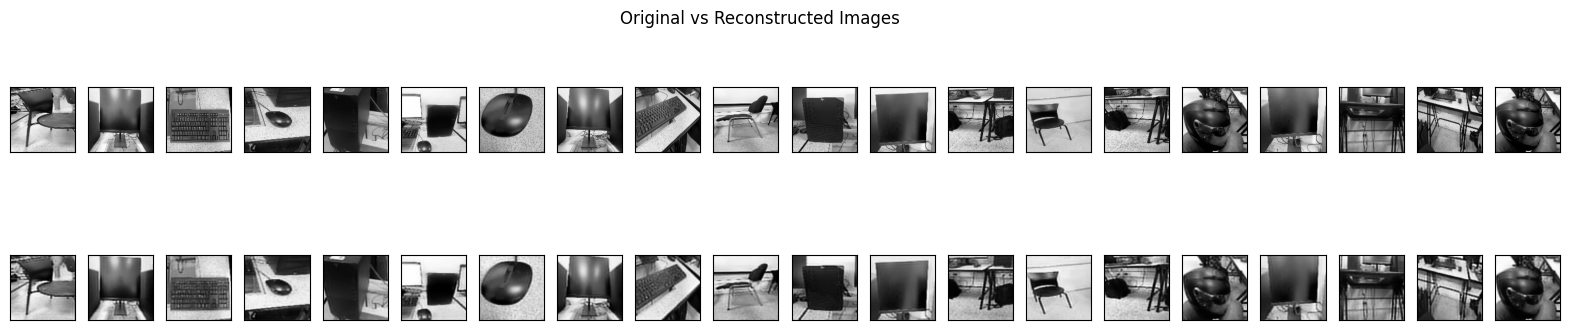

In [7]:
import matplotlib.pyplot as plt

# Use the trained autoencoder to predict reconstructed images
reconstructed_images = autoencoder.predict(images_array_reshaped)

# Display the first 20 original and reconstructed images
n = 20  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images_array_reshaped[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle('Original vs Reconstructed Images')
plt.show()

## Construcción de modelo de clasificación

Construimos un modelo de clasificacion con las etiquetas que tenemos


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the encoder part of the autoencoder model
encoder = Model(inputs=autoencoder.input, outputs=encoded)

# Create a new Sequential model for classification
classification_model = Sequential()

# Add the encoder layers to the classification model and make them non-trainable
for layer in encoder.layers:
    classification_model.add(layer)
    layer.trainable = False

# Flatten the output of the encoder
classification_model.add(Flatten())

# Add Dense layers for classification
classification_model.add(Dense(128, activation='relu'))
classification_model.add(Dense(64, activation='relu'))

# Add the final Dense layer with softmax activation for outputting class probabilities
# Determine the number of unique classes from the labels_array
num_classes = len(np.unique(labels_array))
classification_model.add(Dense(num_classes, activation='softmax'))

# Print the summary of the classification model
classification_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,416,263 (32.11 MB)

 Trainable params: 8,397,447 (32.03 MB)

 Non-trainable params: 18,816 (73.50 KB)

## Entrenamiento del modelo de clasificación


Se realiza el entrnamiento del modelo con las categorias ya definidas

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels in labels_array into numerical format
label_encoder = LabelEncoder()
labels_numerical = label_encoder.fit_transform(labels_array)

# Convert the numerically encoded labels into one-hot encoded format
labels_one_hot = to_categorical(labels_numerical, num_classes=num_classes)

# Compile the classification_model
classification_model.compile(optimizer='adam',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

# Train the classification_model
history_classification = classification_model.fit(images_array_reshaped, labels_one_hot,
                                                 epochs=20,
                                                 validation_split=0.2)

print("Classification model training complete.")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.2882 - loss: 2.7050 - val_accuracy: 0.5895 - val_loss: 1.1090
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.7376 - loss: 0.8635 - val_accuracy: 0.7099 - val_loss: 0.7591
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.8383 - loss: 0.5474 - val_accuracy: 0.8488 - val_loss: 0.5044
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.8823 - loss: 0.3996 - val_accuracy: 0.8272 - val_loss: 0.4495
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.9314 - loss: 0.2499 - val_accuracy: 0.8920 - val_loss: 0.3468
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.9391 - loss: 0.2210 - val_accuracy: 0.8920 - val_loss: 0.3327
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.9530 - loss: 0.1693 - val_accuracy: 0.8981 - val_loss: 0.4025
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.9423 - loss: 0.1933 - val_accuracy: 0.882

## Procedemos a evaluar las metricas del modelo




In [ ]:
evaluation_results = classification_model.evaluate(images_array_reshaped, labels_one_hot, verbose=0)

print(f"Classification Model Evaluation Results:")
print(f"Loss: {evaluation_results[0]:.4f}")
print(f"Accuracy: {evaluation_results[1]:.4f}")

Classification Model Evaluation Results:
Loss: 0.0913
Accuracy: 0.9611


Realizamos el test del modelo con un video en especifico

Video opened successfully. Total frames: 87, Frame rate: 30 FPS
Processing a single video frame and predicting class...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


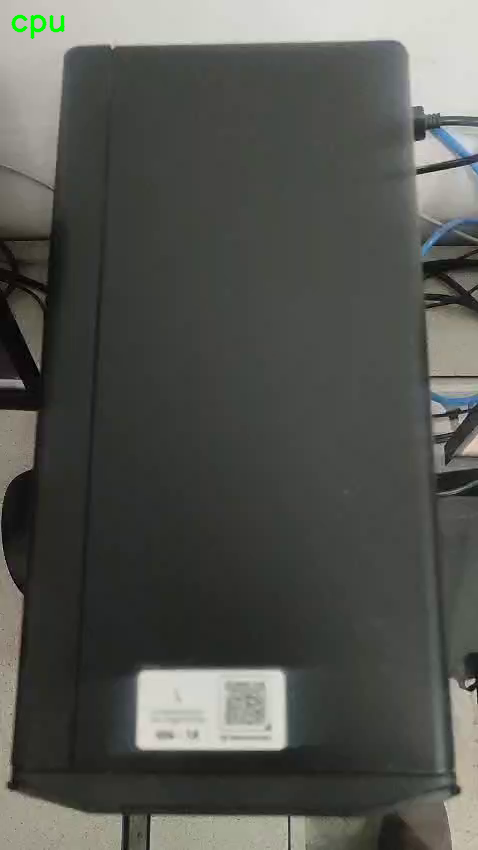

Detected object in the first frame: cpu
Video processing complete.


In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Path to the video file
video_path = '/content/20172167090_cpu.mp4'

# Load the video
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Get video properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    print(f"Video opened successfully. Total frames: {frame_count}, Frame rate: {frame_rate} FPS")

    # Initialize LabelEncoder with the classes used during training
    # Ensure the order of classes is the same as during training
    label_encoder = LabelEncoder()
    # Fit with the unique labels from the labels_array to ensure correctness
    label_encoder.fit(np.unique(labels_array.flatten()))

    print("Processing a single video frame and predicting class...")
    ret, frame = cap.read()

    # If frame is read correctly ret is True
    if ret:
        # Preprocess the frame (resize, grayscale, normalize)
        resized_frame = cv2.resize(frame, (128, 128))
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
        normalized_frame = gray_frame / 255.0

        # Reshape the frame for prediction (add batch and channel dimensions)
        processed_frame = np.expand_dims(normalized_frame, axis=0)
        processed_frame = np.expand_dims(processed_frame, axis=-1)

        # Predict the class using the classification model
        predictions = classification_model.predict(processed_frame)

        # Get the predicted class index
        predicted_class_index = np.argmax(predictions)

        # Decode the predicted class index back to the original label
        predicted_label = label_encoder.inverse_transform([predicted_class_index])

        # Draw the predicted label on the frame
        # Convert the frame back to BGR for drawing
        frame_with_text = cv2.putText(frame, predicted_label[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the frame with the predicted label
        cv2_imshow(frame_with_text)

        print(f"Detected object in the first frame: {predicted_label[0]}")

    else:
        print("Could not read the first frame.")


    # Release the video capture object
    cap.release()


    print("Video processing complete.")

In [20]:
# Save the classification model to an HDF5 file
from google.colab import files
classification_model.save('classification_model.h5')
files.download('classification_model.h5')

print("Classification model saved as classification_model.h5")

Classification model saved as classification_model.h5
